In [2]:
#Imports TODO: Add a install.py script to check if all dependencies are installed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import scipy.signal
from pprint import pprint

In [35]:
class Signal:
    
    def __init__(self, path, mode='dev'):
        file = wf.read(path)
        self.Fs = file[0]
        self.s = file[1]
        self.N = self.s.shape[0]
        self.T = self.N/self.Fs
        self.t = np.arange(0,self.T,1/self.Fs)
        self.mode = mode
        
    
    def plot_signal(self, show = True):
        # Show the sound on a plot
        plt.figure(figsize=(20,10))
        plt.plot(self.t,self.s)
        if show:
            plt.show()
    
    def set_window(self,window):
        if type(window) == type(lambda t: t):
            self.window = window
        else:
            raise TypeError('Invalid type of window, must be a function. eg. lambda x: np.ones(x)')
    
    def find_cut_off(self, W, ratio=0.0001):
        summed = np.sum(W, axis=1)
        summed /= np.linalg.norm(summed)
        max_val = max(summed)
        summed /= max_val
        summed[summed < ratio] = 0
        return np.where(summed == 0)[0][0]
    
    def calc_spectogram(self, n, t_low=0, t_high=-1):
        # cut up the data into n smaller pieces

        # setup the array size
        n = 1000
        while self.N%n != 0: #Find the first integer division
            n -= 1

        l_probe = int(self.N/n)
        t_probe = l_probe/self.Fs
        if (self.mode == 'dev'): print('Length of probe: {}, {:.3f}s \nNumber of probes: {}'.format(l_probe, t_probe, n))

        a_minor = self.s.reshape(n, int(self.N/n))
        t_minor = np.arange(0, int(self.N/n)/self.Fs, 1/self.Fs)
        
        #Ok so now we have an array of a cut up signal, we need to window each signal and find the FFT of all trials
        w = self.window(l_probe)
        w_minor = a_minor * w
        self.W_minor = abs(np.fft.rfft(w_minor).astype('float')).T
        self.F_minor = np.fft.rfftfreq(len(w_minor[0]), 1/self.Fs)
    
    def plot_spectogram(self, N_wsp=1000, show = True, ratio = 0.01, t_start=0, t_end=1): # TODO time window, extra diagrams, left f(w) bottom f(t)
        try:
            if self.W_minor == None or self.F_minor == None:
                pass
        except:
            self.calc_spectogram(N_wsp)
        print(self.W_minor.shape)
        cutoff = self.find_cut_off(self.W_minor, ratio)
        plt.imshow(self.W_minor[:cutoff], extent=[ 0, self.t[-1], 0, self.F_minor[cutoff] ], aspect=self.t[-1]/self.F_minor[cutoff], origin='lower', cmap="hot")
        plt.colorbar()
        if show:
            plt.show()
    
    
        


Length of probe: 1620, 0.037s 
Number of probes: 980
(811, 980)


/home/pawel/.local/lib/python3.5/site-packages/ipykernel/__main__.py:52: ComplexWarning: Casting complex values to real discards the imaginary part


Length of probe: 1620, 0.037s 
Number of probes: 980
(811, 980)


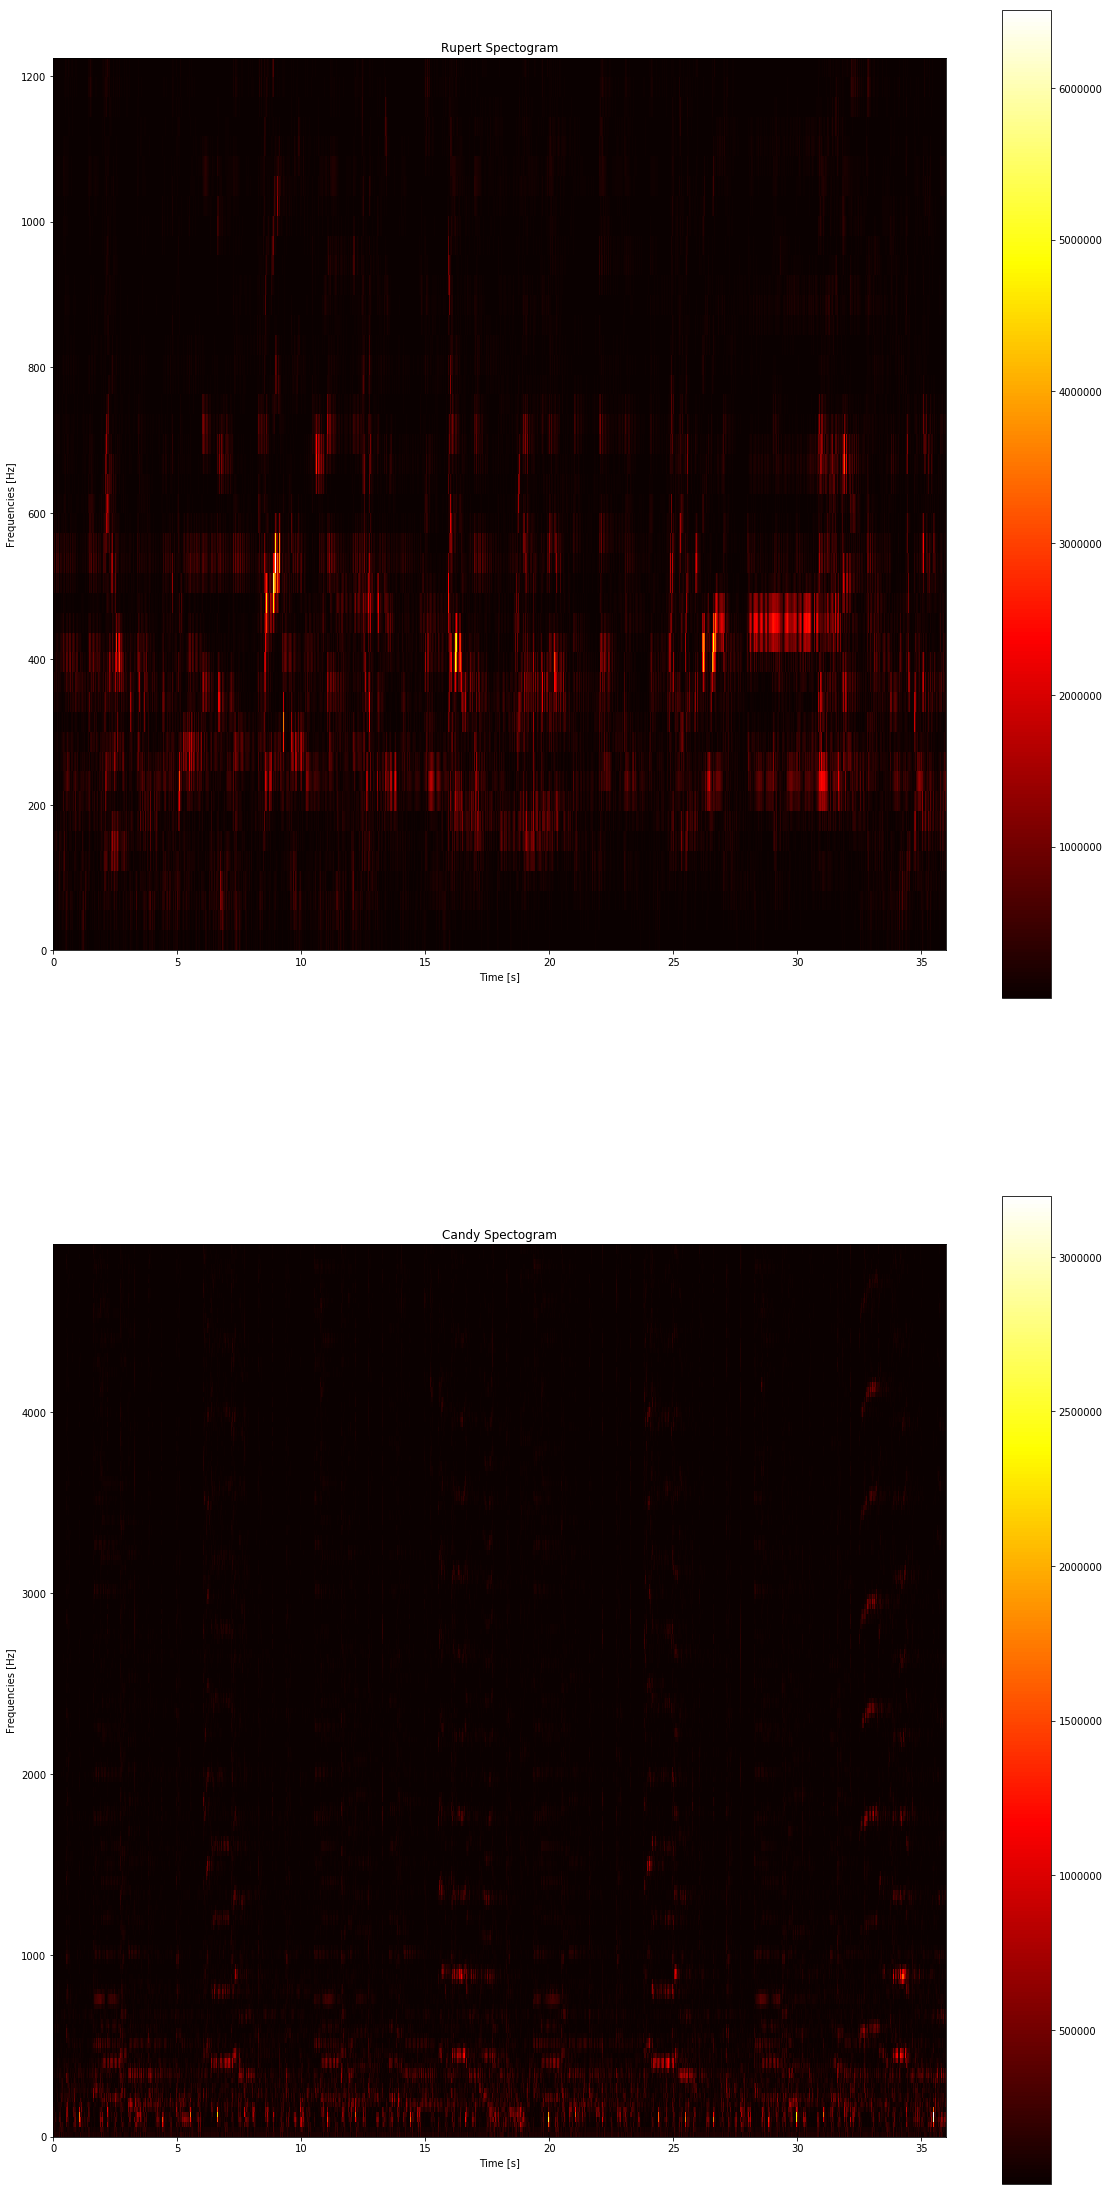

In [40]:
plt.figure(figsize=((20,40)))

plt.subplot(2,1,1)
rupert = Signal('./data/rupert.wav')
rupert.set_window(lambda n: scipy.signal.blackman(n))
plt.title('Rupert Spectogram')
plt.ylabel('Frequencies [Hz]')
plt.xlabel('Time [s]')
rupert.plot_spectogram(show=False, N_wsp=30, ratio=0.03)


plt.subplot(2,1,2)
candy = Signal('./data/candy.wav')
candy.set_window(lambda n: scipy.signal.blackman(n))
plt.title('Candy Spectogram')
plt.ylabel('Frequencies [Hz]')
plt.xlabel('Time [s]')
candy.plot_spectogram(show=False, N_wsp=30, ratio=0.03)

plt.show()